### ML Assignment 1: Exercise 2

Analyzing the Yeast UCI dataset

In [33]:
#Libraries 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Loading and describing the dataset

In [7]:
#Adding a header, as the dataset doesn't have a header for the columns

yeast_df = pd.read_fwf("yeast.data", names =["SeqName", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "site"]) 

In [9]:
yeast_df.head()

,SeqName,mcg,gvh,alm,mit,erl,pox,vac,nuc,site
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [11]:

yeast_df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


#### The values appear to be normalized, no entry exceeds 1

### Searching for missing data (Nan values)



In [13]:

yeast_df.isnull().sum() # The dataset doesn't have missing values

SeqName    0
mcg        0
gvh        0
alm        0
mit        0
erl        0
pox        0
vac        0
nuc        0
site       0
dtype: int64

In [28]:
X =yeast_df[[ "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc"]]
y= yeast_df["site"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1187, 8) (1187,)
(297, 8) (297,)


In [31]:
from sklearn.neighbors import KNeighborsClassifier as kNN

def knn_classifier_score(k,X_train,y_train,X_test,y_test):
    model=kNN(n_neighbors=k).fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([metrics.accuracy_score(y_test,y_test_pred),
                     metrics.accuracy_score(y_train,y_train_pred)])

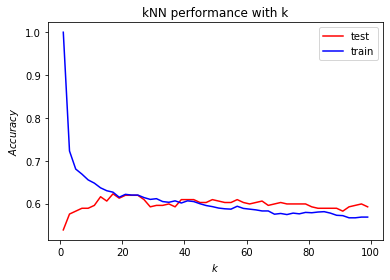

In [41]:
import numpy as np
k_values=np.arange(1,101,2);

errors = map(lambda k: knn_classifier_score(k,X_train,y_train,X_test,y_test),k_values);
errors = list(errors);
test_error = [x[0] for x in errors];
train_error = [x[1] for x in errors];

plt.xlabel('$k$');
plt.ylabel('$Accuracy$');
plt.title('kNN performance with k');
plt.plot(k_values,test_error,color='red');
plt.plot(k_values,train_error,color='blue');
plt.legend(['test','train']);

In [43]:
test_error.index(max(test_error))
    

8

In [44]:
max(test_error)

0.622895622895623